In [1]:
import sys
sys.path.append('..')
import quarantines as Q
import quarantines_mongo as qm
import graph_generators as gg 
import networkx as nx 
import networkit as nk
import pymongo
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from tabulate import tabulate
from scipy import stats
from pprint import pprint
import random
sns.set()

In [5]:
N = 10 ** 4
G = gg.plc_graph(N, 10, 0.9)

In [7]:
for _ in range(21):
    p = _ / 20
    cc = nx.average_clustering(gg.plc_graph(N, 10, p))
    print(p, cc)

0.0 0.010631100059040855
0.05 0.019907389986309577
0.1 0.028929149198996976
0.15 0.03956767477904275
0.2 0.0488699313237081
0.25 0.059457244795537906
0.3 0.06690313064551445
0.35 0.07740187966365829
0.4 0.08724548639390713
0.45 0.09434792730747764
0.5 0.10347612882167256
0.55 0.11044951505205026
0.6 0.11715087675537304
0.65 0.12582015084319717
0.7 0.13656103824794913
0.75 0.14560785381400276
0.8 0.15816896168818123
0.85 0.17243963325622644
0.9 0.19528791317979288
0.95 0.23166913219672897
1.0 0.2850359450837397


In [18]:
def make_vs(G, tau, gamma, rho, proprange):
    output_list = []
    for prop in proprange:
        print(prop)
        output_list.append((prop, Q.quarantine_by_prop(G, tau, gamma, rho, prop, float('inf'), num_iter=5).get_final_R()))
    return output_list


In [37]:
locluster = gg.plc_graph(N, 10, 0.1)
locluster_v = make_vs(locluster, 0.5, 1.0, 10/ len(locluster), [_ / 20 for _ in range(20)])

0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95


In [38]:
hicluster = gg.plc_graph(N, 10, 0.9)
hicluster_v = make_vs(hicluster, 0.5, 1.0, 10/ len(hicluster), [_ / 20 for _ in range(20)])

0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95


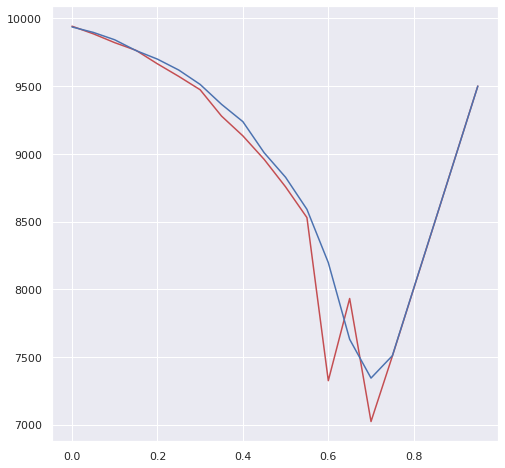

In [39]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(*zip(*locluster_v), c='r')
ax.plot(*zip(*hicluster_v), c='b')

In [24]:
nx.average_clustering(locluster)

0.029372466106747253

In [25]:
nx.average_clustering(hicluster)

0.19225264900608538

In [27]:
for i in range(5, 20):
    G = gg.plc_graph(N, i, 0.5)
    print(G.number_of_edges() / len(G), nx.average_clustering(G))

4.9952 0.17786152306498426
5.9936 0.15345128372728908
6.9909 0.13416743613465068
7.9872 0.1223282836472414
8.9823 0.11096200515638195
9.9786 0.10295177680790941
10.9751 0.09599124705595562
11.9694 0.09038851899551138
12.9676 0.08541971087961898
13.96 0.08128625554666553
14.9544 0.07915150529837148
15.9494 0.07837259522425827
16.9424 0.07556736167345007
17.934 0.07471763099510273
18.9285 0.07393802995972824


In [35]:
nx.average_clustering(gg.plc_graph(N, 20, 0.8))

0.08998094692762773

In [34]:
nx.average_clustering(gg.plc_graph(N, 5, 0.25))

0.09172992028772067

In [36]:
lowdeg = gg.plc_graph(N, 5, 0.25)
highdeg1 = gg.plc_graph(N, 20, 0.25)
highdeg2 = gg.plc_graph(N, 20, 0.8)


In [40]:
lodeg_v = make_vs(lowdeg, 0.5, 1.0, 10/ len(lowdeg), [_ / 20 for _ in range(20)])
highdeg1_v = make_vs(highdeg1, 0.5, 1.0, 10/ len(highdeg1), [_ / 20 for _ in range(20)])
highdeg2_v = make_vs(highdeg2, 0.5, 1.0, 10/ len(highdeg2), [_ / 20 for _ in range(20)])

0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95


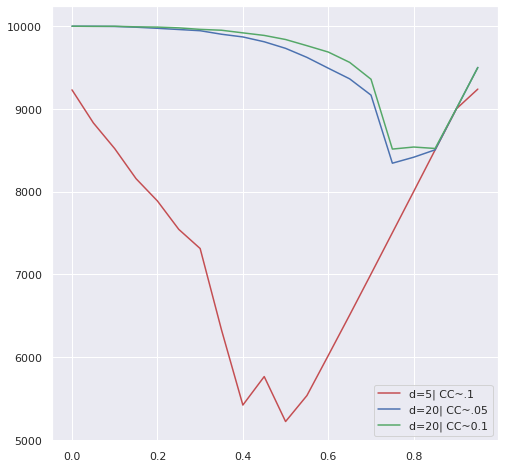

In [49]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(*zip(*lodeg_v), c='r', label='d=5| CC~.1')
ax.plot(*zip(*highdeg1_v), c='b', label='d=20| CC~.05')
ax.plot(*zip(*highdeg2_v), c='g', label='d=20| CC~0.1')
ax.legend(loc='lower right')

In [46]:
nx.average_clustering(highdeg2)

0.09009237230246112